# About this notebook
Implement of [Gozsoy's Conditionval VAE code(github)](https://github.com/gozsoy/conditional-vae).
Originaly I imported [Elmisis's VAE code(github)](https://github.com/EleMisi/ConditionalVAE/) to make this [example](https://github.com/chhyyi/rz_cvae) but loss diverges. Also input of attributes(or conditioned input) are not efficient so I found another codes.   

As team decided not to solve this problem cuz deadline of Aiffelthon is DEC 13, there will be no discussion about diverging loss.  

I'll change only some lines of [cvae_example](https://github.com/chhyyi/rz_cvae/blob/main/cvae_expamle.ipynb) and python scripts (actually many part of gozsoy's code is hard coded but I'm not gonna fix that)

# Some test
1. input parameter of conditional_encoder2 is hard-coded. So I'd better test this one.
2. I think this is  all I need then   

```python  
if __name__ == '__main__':

    beta = 1e-11
    epochs = 10
    latent_dim = 15

    train_ds,dataset_mean,dataset_std = prepare_data()

    model,z_mu_list,label_list = train(latent_dim,beta,epochs,train_ds,dataset_mean,dataset_std)
```

In [1]:
import gozsoy_src.model as gmodel
import gozsoy_src.main as gmain
import gozsoy_src.utils as gutils

import tensorflow as tf

# copy of cvae_example

In [2]:
# load dataset
import pandas as pd
list_attr_path = "list_attr.csv"

In [3]:
import gozsoy_src.model as gmodel
import gozsoy_src.main as gmain
import gozsoy_src.utils as gutils

import tensorflow as tf
import rz_cvae.Dataset as Dataset
from rz_cvae.utils import save_data
from gozsoy_src.model import Conditional_VAE

learning_rate = 0.001
train_size = 1.0
batch_size = 4
save_test_set = True
# S# True: the test set image IDs and other useful information will be stored in a pickle file to further uses (e.g. Image_Generation.ipynb) 

dataset = Dataset.Dataset(train_size = train_size,batch_size = batch_size,save_test_set = save_test_set)
label_dim = 26
image_dim = [4, 1024, 1024, 6]
latent_dim = 128


# Model
model = gmodel.Conditional_VAE(latent_dim)

# Optiizer
optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)


Loading images id and attributes...
img_ids: 1515 
Attributes: 26 

Splitting dataset...

Train set dimension: 1515 
Test set dimension: 0 

<class 'dict'>
Test data successfully saved.


## set checkpoint

In [4]:
import os

# Checkpoint path
checkpoint_root = "./CVAE_gozsoy_{}_{}".format(latent_dim, train_size) 
checkpoint_name = "model"
save_prefix = os.path.join(checkpoint_root, checkpoint_name)

# Define the checkpoint
checkpoint = tf.train.Checkpoint(module=model)

In [5]:
import warnings

warnings.filterwarnings("ignore")

import numpy as np
import time
from rz_cvae.utils import train_step

beta = 1e-4 #it was too low... but why?? Still I don't understand KL loss.


train_losses = []
train_recon_errors = []
train_latent_losses = []
loss = []
reconstruct_loss = []
latent_loss = []

step_index = 0
n_batches = int(dataset.train_size / batch_size)
n_epochs = 20

print("Number of epochs: {},  number of batches: {}".format(n_epochs, n_batches))

# Epochs Loop
for epoch in range(n_epochs):
    start_time = time.perf_counter()
    dataset.shuffle() # Shuffling

    # Train Step Loop
    for step_index, inputs in enumerate(dataset):

        with tf.GradientTape() as tape:
            # forward pass
            z_mu,z_rho,decoded_imgs = model(inputs[0],inputs[1])

            # compute loss
            mse,kl = gmain.elbo(z_mu,z_rho,decoded_imgs,inputs[0])
            total_loss = mse + beta * kl

        # compute gradients
        gradients = tape.gradient(total_loss,model.variables)

        # update weights
        optimizer.apply_gradients(zip(gradients, model.variables))

        # compute loss
        train_losses.append(total_loss)
        train_recon_errors.append(mse)
        train_latent_losses.append(kl)

        if step_index + 1 == n_batches:
            break

    loss.append(np.mean(train_losses, 0))
    reconstruct_loss.append(np.mean(train_recon_errors, 0))
    latent_loss.append(np.mean(train_latent_losses, 0))

    exec_time = time.perf_counter() - start_time
    print("Execution time: %0.3f \t Epoch %i: loss %0.4f | reconstr loss %0.4f | latent loss %0.4f"
                        % (exec_time, epoch, loss[epoch], reconstruct_loss[epoch], latent_loss[epoch])) 

    if np.isnan([loss[-1], reconstruct_loss[-1], latent_loss[-1]]).any():
        print("loss diverged. stop training")
        break
    
    # Save progress every 5 epochs
    if (epoch + 1) % 5 == 0:
        checkpoint.save(save_prefix + "_" + str(epoch + 1))
        print("Model saved:", save_prefix)

# Save the final model                
checkpoint.save(save_prefix)
print("Model saved:", save_prefix)


Number of epochs: 30,  number of batches: 378
IDs shuffled.


Corrupt JPEG data: 54 extraneous bytes before marker 0xd9
Corrupt JPEG data: 2 extraneous bytes before marker 0xd9
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: 14 extraneous bytes before marker 0xd9
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: 7 extraneous bytes before marker 0xd9
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: 2 extraneous bytes before marker 0xd9
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: 54 extraneous bytes before marker 0xd9
Corrupt JPEG data: 2 extraneous bytes before marker 0xd9
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JP

Execution time: 184.149 	 Epoch 0: loss 100.2322 | reconstr loss 100.2321 | latent loss 0.1763
IDs shuffled.


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: 3 extraneous bytes before marker 0xd9
Corrupt JPEG data: 7 extraneous bytes before marker 0xd9
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corr

Execution time: 177.614 	 Epoch 1: loss 76.9765 | reconstr loss 76.9765 | latent loss 0.0932
IDs shuffled.


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: 3 extraneous bytes before marker 0xd9
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG

Execution time: 177.438 	 Epoch 2: loss 67.4825 | reconstr loss 67.4825 | latent loss 0.0630
IDs shuffled.


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: 54 extraneous bytes before marker 0xd9
Corrupt JPEG data: 54 extraneous bytes before marker 0xd9
Corrupt JPEG data: 54 extraneous bytes before marker 0xd9
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: 54 extraneous bytes before marker 0xd9
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: 3 extraneous bytes before marker 0xd9
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: 54 extraneous bytes before marker 0xd9
Corrupt JPEG dat

Execution time: 177.455 	 Epoch 3: loss 62.5934 | reconstr loss 62.5934 | latent loss 0.0479
IDs shuffled.


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: 54 extraneous bytes before marker 0xd9
Corrupt JPEG data: 54 extraneous bytes before marker 0xd9
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: 54 extraneous bytes before marker 0xd9
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: 54 extraneous bytes before marker 0xd9
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: 54 extraneous bytes before marker 0xd9
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: 54 extraneous bytes before marker 0xd9
Corrupt JPEG da

Execution time: 177.440 	 Epoch 4: loss 59.3739 | reconstr loss 59.3739 | latent loss 0.0387
Model saved: ./CVAE_gozsoy_128_1.0/model
IDs shuffled.


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: 54 extraneous bytes before marker 0xd9
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: 3 extraneous bytes before marker 0xd9
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Cor

Execution time: 176.981 	 Epoch 5: loss 57.3893 | reconstr loss 57.3893 | latent loss 0.0325
IDs shuffled.


Corrupt JPEG data: 54 extraneous bytes before marker 0xd9
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: 54 extraneous bytes before marker 0xd9
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: 54 extraneous bytes before marker 0xd9
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: 54 extraneous bytes before marker 0xd9
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end 

Execution time: 176.625 	 Epoch 6: loss 55.3511 | reconstr loss 55.3511 | latent loss 0.0279
IDs shuffled.


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: p

Execution time: 175.962 	 Epoch 7: loss 54.6574 | reconstr loss 54.6574 | latent loss 0.0245
IDs shuffled.


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: p

Execution time: 176.924 	 Epoch 8: loss 53.6432 | reconstr loss 53.6432 | latent loss 0.0219
IDs shuffled.


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: p

Execution time: 178.302 	 Epoch 9: loss 54.2210 | reconstr loss 54.2210 | latent loss 0.0197
Model saved: ./CVAE_gozsoy_128_1.0/model
IDs shuffled.


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: p

Execution time: 177.718 	 Epoch 10: loss 53.5790 | reconstr loss 53.5790 | latent loss 0.0179
IDs shuffled.


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: p

Execution time: 177.061 	 Epoch 11: loss 52.3398 | reconstr loss 52.3398 | latent loss 0.0165
IDs shuffled.


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: p

Execution time: 176.911 	 Epoch 12: loss 52.2192 | reconstr loss 52.2192 | latent loss 0.0152
IDs shuffled.


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: 3 extraneous bytes before marker 0xd9
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG

Execution time: 177.155 	 Epoch 13: loss 51.0919 | reconstr loss 51.0919 | latent loss 0.0142
IDs shuffled.


Corrupt JPEG data: 3 extraneous bytes before marker 0xd9
Corrupt JPEG data: 3 extraneous bytes before marker 0xd9
Corrupt JPEG data: 3 extraneous bytes before marker 0xd9
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: 3 extraneous bytes before marker 0xd9
Corrupt JPEG data: 3 extraneous bytes before marker 0xd9
Corrupt JPEG data: 3 extraneous bytes before marker 0xd9
Corrupt JPEG data: 3 extraneous bytes before marker 0xd9
Corrupt JPEG data: 3 extraneous bytes before marker 0xd9
Corrupt JPEG data: 3 extraneous bytes before marker 0xd9
Corrupt JPEG data: 3 extraneous bytes before marker 0xd9
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: 3 extraneous bytes before marker 0xd9
Corrupt JPEG data: 3 extraneous bytes before marker 0xd9
Corrupt JPEG data: 3 extraneous bytes before marker 0xd9
Corrupt JPEG data: 3 extraneous bytes before marker 0xd9
Corrupt JPEG data: 3 extraneous bytes before marker 0xd

Execution time: 177.036 	 Epoch 14: loss 51.0778 | reconstr loss 51.0778 | latent loss 0.0132
Model saved: ./CVAE_gozsoy_128_1.0/model
IDs shuffled.


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: p

Execution time: 176.261 	 Epoch 15: loss 50.9716 | reconstr loss 50.9716 | latent loss 0.0124
IDs shuffled.
Execution time: 177.110 	 Epoch 16: loss 50.7264 | reconstr loss 50.7264 | latent loss 0.0117
IDs shuffled.


Corrupt JPEG data: 3 extraneous bytes before marker 0xd9
Corrupt JPEG data: 3 extraneous bytes before marker 0xd9
Corrupt JPEG data: 3 extraneous bytes before marker 0xd9
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: 3 extraneous bytes before marker 0xd9
Corrupt JPEG data: 3 extraneous bytes before marker 0xd9
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: 3 extraneous bytes before marker 0xd9
Corrupt JPEG data: 3 extraneous bytes before marker 0xd9
Corrupt JPEG data: 3 extraneous bytes before marker 0xd9
Corrupt JPEG data: 3 extraneous bytes before marker 0xd9
Corrupt JPEG data: 3 extraneous bytes before marker 0xd9
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: 3 extraneous bytes before marker 0xd9
Corrupt JPEG data: 3 extraneous bytes before marker 0xd9
Corrupt JPEG data: 3 extraneous bytes before marker 0xd9
Corrupt JPEG d

Execution time: 176.301 	 Epoch 17: loss 50.0085 | reconstr loss 50.0085 | latent loss 0.0111
IDs shuffled.


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: p

Execution time: 177.445 	 Epoch 18: loss 49.5137 | reconstr loss 49.5137 | latent loss 0.0105
IDs shuffled.


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Execution time: 177.227 	 Epoch 19: loss 48.9867 | reconstr loss 48.9867 | latent loss 0.0100
Model saved: ./CVAE_gozsoy_128_1.0/model
IDs shuffled.


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: p

Execution time: 178.052 	 Epoch 20: loss 48.9524 | reconstr loss 48.9524 | latent loss 0.0095
IDs shuffled.


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: p

Execution time: 174.917 	 Epoch 21: loss 48.1094 | reconstr loss 48.1094 | latent loss 0.0091
IDs shuffled.


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: p

Execution time: 177.145 	 Epoch 22: loss 48.0204 | reconstr loss 48.0204 | latent loss 0.0087
IDs shuffled.


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: p

Execution time: 177.259 	 Epoch 23: loss 47.8910 | reconstr loss 47.8910 | latent loss 0.0083
IDs shuffled.


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: p

Execution time: 176.734 	 Epoch 24: loss 47.4783 | reconstr loss 47.4783 | latent loss 0.0080
Model saved: ./CVAE_gozsoy_128_1.0/model
IDs shuffled.


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: p

Execution time: 179.489 	 Epoch 25: loss 47.8869 | reconstr loss 47.8869 | latent loss 0.0077
IDs shuffled.


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: p

Execution time: 177.476 	 Epoch 26: loss 47.9621 | reconstr loss 47.9621 | latent loss 0.0074
IDs shuffled.


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: p

Execution time: 177.517 	 Epoch 27: loss 48.0042 | reconstr loss 48.0042 | latent loss 0.0072
IDs shuffled.


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: p

Execution time: 179.677 	 Epoch 28: loss 48.1298 | reconstr loss 48.1298 | latent loss 0.0069
IDs shuffled.


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: p

Execution time: 179.862 	 Epoch 29: loss 48.4620 | reconstr loss 48.4620 | latent loss 0.0067
Model saved: ./CVAE_gozsoy_128_1.0/model
Model saved: ./CVAE_gozsoy_128_1.0/model


In [6]:
checkpoint.restore(os.path.join(checkpoint_root,'model_30-6'))

In [7]:

import argparse
import json
import os
from matplotlib import pyplot as plt
import sys
import numpy as np

import tensorflow as tf

from rz_cvae.utils import batch_generator, convert_batch_to_image_grid, read_data

# Read test_data.pickle 
test_data = read_data("./test_data")
print(test_data)

{'train_size': 1515, 'test_img_ids': [], 'train_img_ids': [(0, [0.12396694, 0.45555556, 0.8264249, 0.8127854, 0.0, 0.04391892, 0.93333334, 0.85897434, 0.6825397, 0.0, 0.115384616, 0.49444443, 0.87401575, 0.6681416, 0.0, 0.0877193, 0.2888889, 0.86756754, 0.7723214, 0.0, 0.104803495, 0.29166666, 0.9460993, 0.81781375, 0.0, 0.0]), (1, [0.1983471, 0.2611111, 0.84715027, 0.8721461, 0.0, 0.16891892, 0.22777778, 0.9051282, 0.8677249, 0.0, 0.21336032, 0.1630117, 0.8625501, 0.671402, 0.0, 0.26754385, 0.23055555, 0.8783784, 0.81696427, 0.0, 0.12663755, 0.3638889, 0.9531915, 0.8663968, 0.0, 0.0]), (2, [0.30578512, 0.13611111, 0.7953368, 0.79452056, 0.0, 0.16216215, 0.26666668, 0.8871795, 0.77248675, 0.0, 0.2923077, 0.3, 0.87401575, 0.6283186, 0.0, 0.24561404, 0.14444445, 0.84324324, 0.8035714, 0.0, 0.36681223, 0.2611111, 0.9390071, 0.84615386, 0.0, 0.0]), (3, [0.26859504, 0.2611111, 0.83419687, 0.8584475, 0.0, 0.15202703, 0.3888889, 0.87948716, 0.85714287, 0.0, 0.16538462, 0.30833334, 0.8871391, 

In [8]:
batch_gen = batch_generator(test_data['batch_size'], test_data['train_img_ids'], model_name = 'Conv')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


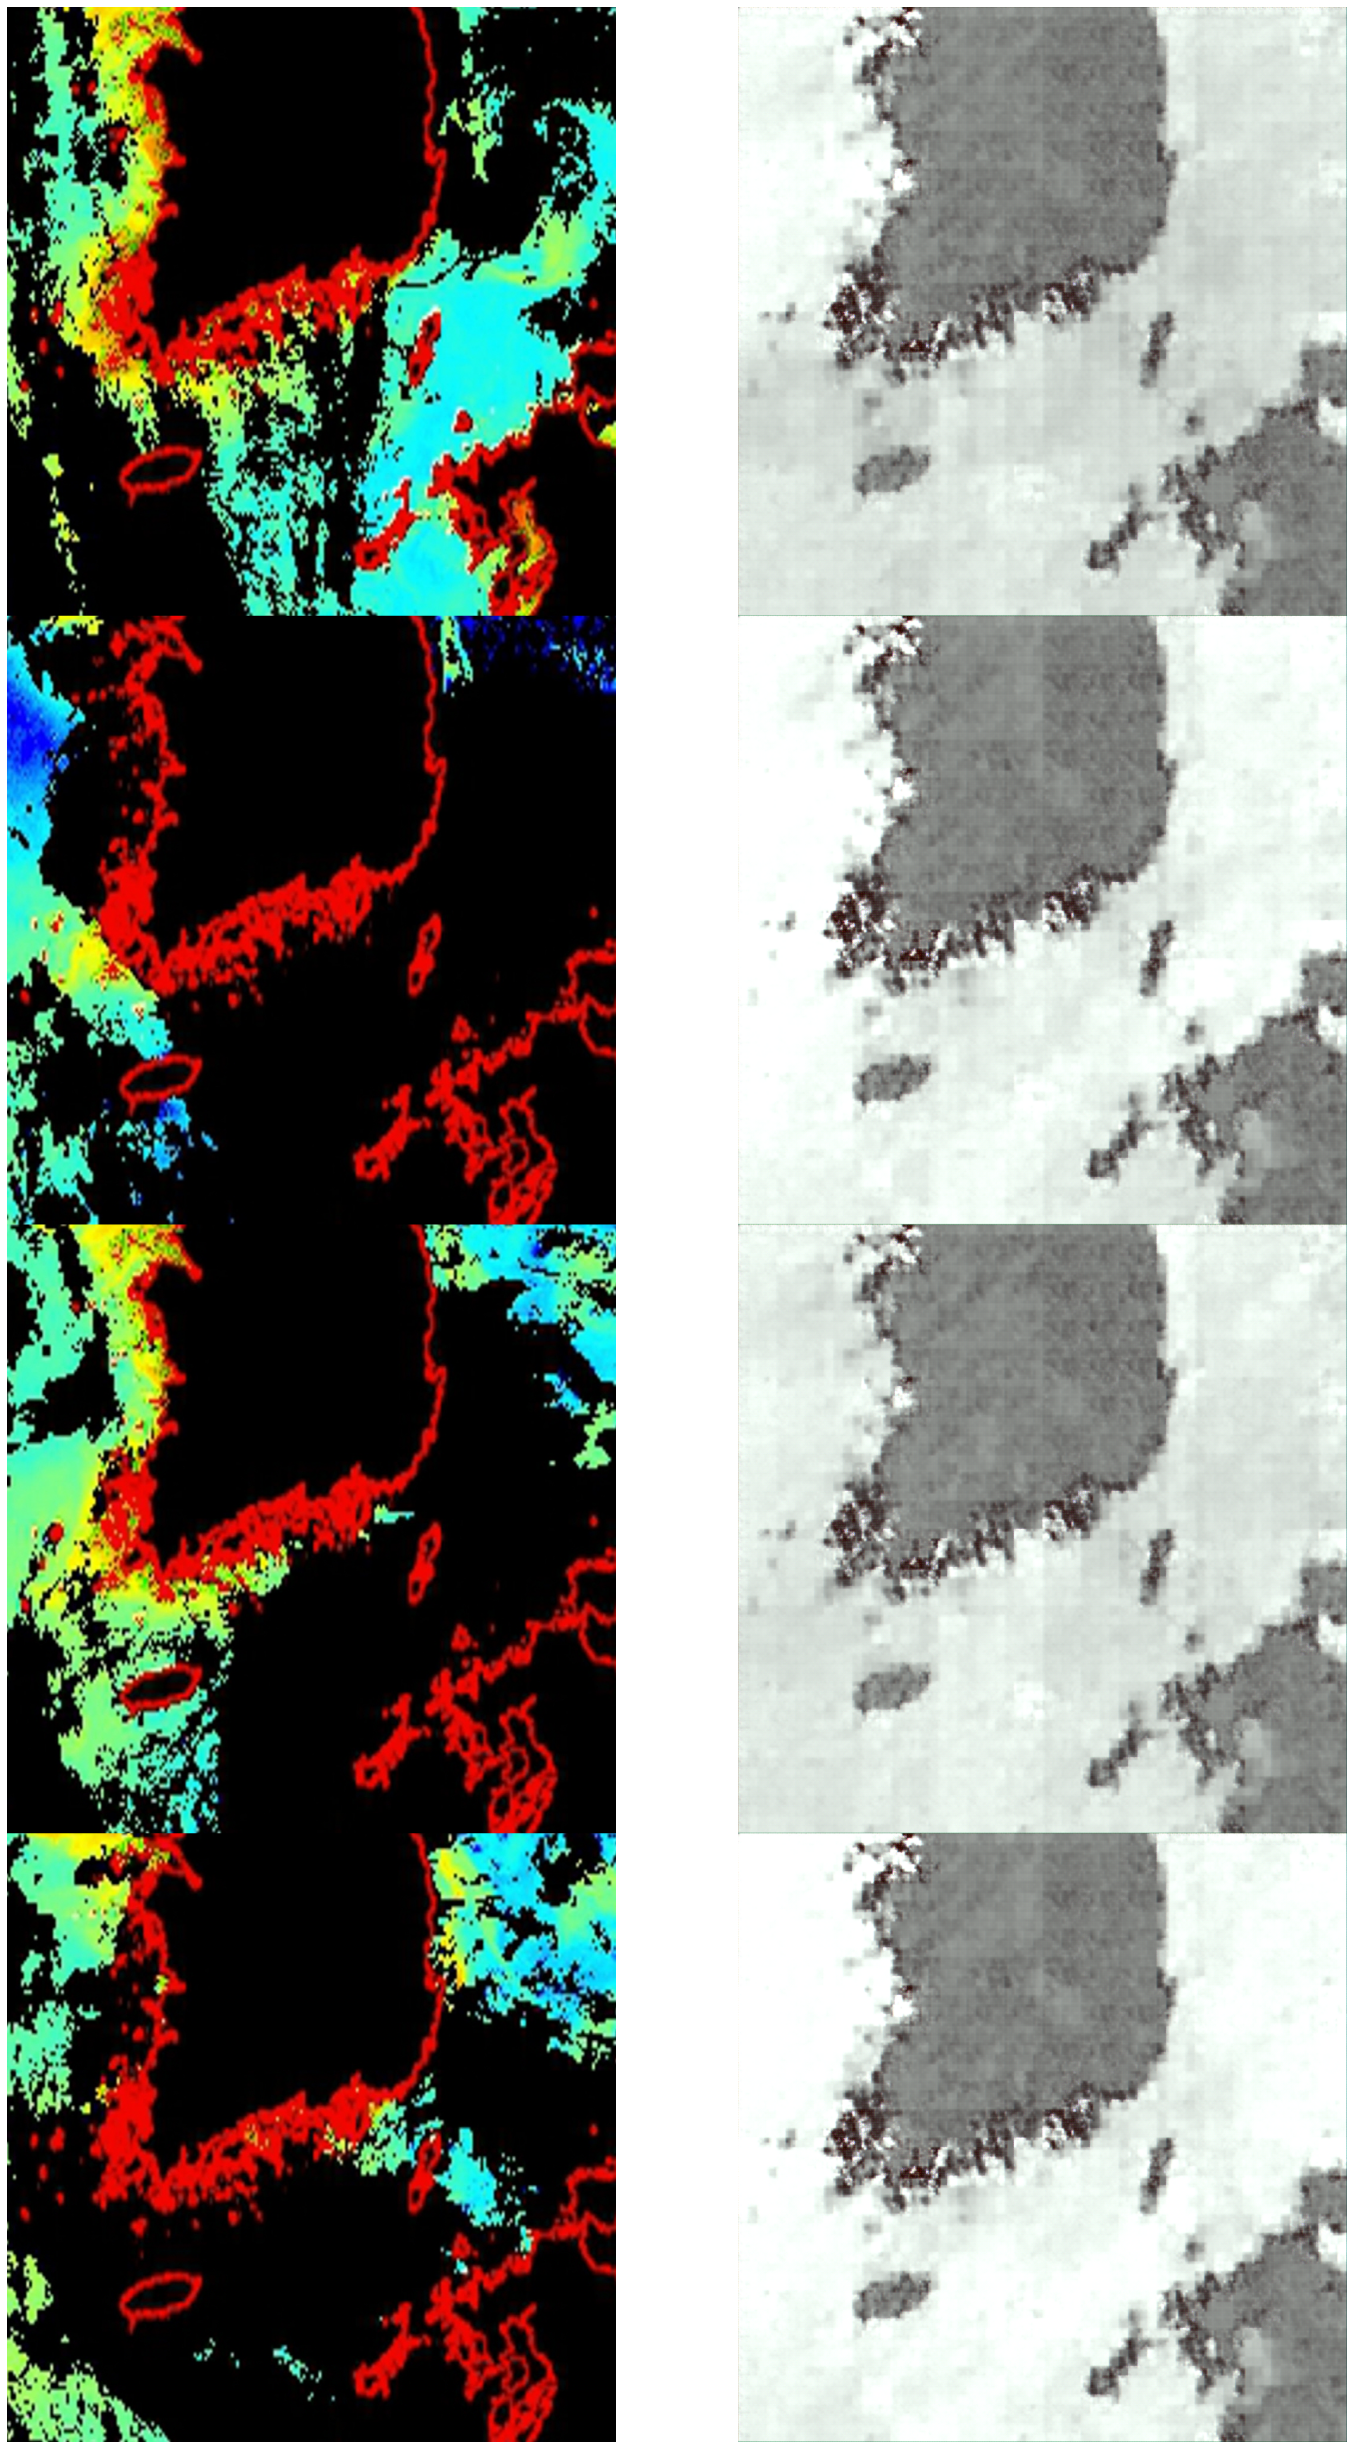

Reconstruction of a batch of test set images.


<Figure size 432x288 with 0 Axes>

In [9]:

"""
Reconstructs and plots a bacth of test images.
"""

inputs = next(batch_gen)
images=inputs[0]
_, _, pred_img= model(inputs[0], inputs[1])

#pred_img=(pred_img-np.min(pred_img))/(np.max(pred_img)-np.min(pred_img))

#print(test_data[''])

f = plt.figure(figsize=(24,60))
ax = f.add_subplot(1,2,1)
ax.imshow(convert_batch_to_image_grid(images))
plt.axis('off')

ax = f.add_subplot(1,2,2)
ax.imshow(convert_batch_to_image_grid(pred_img.numpy()))
plt.axis('off')


save_path = False
if save_path :
    plt.savefig(save_path + "reconstruction.png")

plt.show()
plt.clf()

print("Reconstruction of a batch of test set images.")

In [10]:
print(np.max(pred_img), np.min(pred_img))
pred_img=(pred_img-np.min(pred_img))/(np.max(pred_img)-np.min(pred_img))
print(np.max(pred_img), np.min(pred_img))

1.8077748 -0.21191032
1.0 0.0


In [11]:
print([x.split('/')[-1] for x in paths])

NameError: name 'paths' is not defined

In [ ]:
images, labels, paths = next(batch_gen)
_, _, pred_img= model(images, labels)

#print(test_data[''])

f = plt.figure(figsize=(24,60))
ax = f.add_subplot(1,2,1)
ax.imshow(convert_batch_to_image_grid(images))
plt.axis('off')

ax = f.add_subplot(1,2,2)
ax.imshow(convert_batch_to_image_grid(pred_img.numpy()))
plt.axis('off')


save_path = False
if save_path :
    plt.savefig(save_path + "reconstruction.png")

plt.show()
plt.clf()

print("Reconstruction of a batch of test set images.")

In [ ]:
print([x.split('/')[-1] for x in paths])